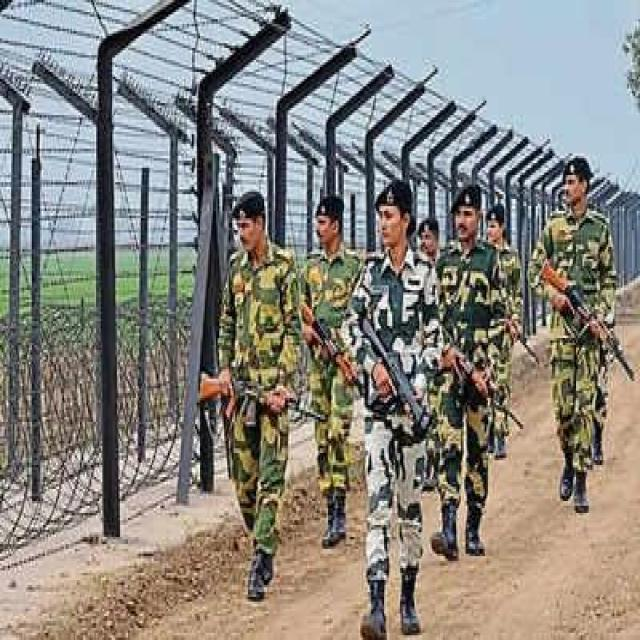


image 1/1 /home/rishabhnagar/practising/soldier_uniform_detection/test_sample_images/test1.jpg: 640x640 5 bsfs, 70.6ms
Speed: 1.5ms preprocess, 70.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)
Detected Soldier - Class ID: 0, Confidence: 0.8843982219696045, BBox: [534.6543579101562, 158.0528564453125, 622.5032348632812, 526.8280029296875]
Detected Soldier - Class ID: 0, Confidence: 0.8777775168418884, BBox: [432.3756103515625, 186.1944580078125, 526.567626953125, 567.3516845703125]
Detected Soldier - Class ID: 0, Confidence: 0.8492206335067749, BBox: [290.5605773925781, 184.78955078125, 375.7852478027344, 558.4900512695312]
Detected Soldier - Class ID: 0, Confidence: 0.8327113389968872, BBox: [199.215576171875, 178.41729736328125, 307.933837890625, 599.7581787109375]
Detected Soldier - Class ID: 0, Confidence: 0.7739648818969727, BBox: [361.6746826171875, 179.3641357421875, 432.6578369140625, 635.3530883789062]


In [15]:
import albumentations as A
from albumentations.pytorch import ToTensorV2
import cv2
import numpy as np
import torch
from ultralytics import YOLO
import matplotlib.pyplot as plt
from PIL import Image

# Load the user's trained YOLOv8n model
model_path = 'soldier_model.pt'

model_yolo = YOLO(model_path) 

def augment_image(image_path):
    """Apply augmentations to simulate edge cases."""
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    transform = A.Compose([
        A.RandomBrightnessContrast(p=0.3),  # Simulates low-light conditions
        A.CoarseDropout(max_holes=10, max_height=20, max_width=20, p=0.5),  # Simulates occlusion
        A.MotionBlur(p=0.6),  # Simulates motion blur
        # A.RandomSizedCrop((90, 90), 100, 100, p=0.4),  # Partial visibility
        ToTensorV2()
    ])
    
    augmented = transform(image=image)
    return augmented['image']

def detect_and_classify_soldiers(image_path):
    """Detect and classify soldiers in an image using the trained YOLO model."""
    results = model_yolo(image_path)
    
    detections = []
    for result in results:
        for box in result.boxes:
            class_id = int(box.cls)
            confidence = float(box.conf)
            bbox = [float(x) for x in box.xyxy[0]]  # Bounding box (x1, y1, x2, y2)
            detections.append({
                "class_id": class_id,
                "confidence": confidence,
                "bbox": bbox
            })
    return detections  # List of detected soldiers with their class labels and confidence scores

# Example usage

image_path = "test_sample_images/test1.jpg"

img = Image.open(image_path)
display(img)

detections = detect_and_classify_soldiers(image_path)

for detection in detections:
    print(f"Detected Soldier - Class ID: {detection['class_id']}, Confidence: {detection['confidence']}, BBox: {detection['bbox']}")

/tmp/ipykernel_236836/1407552707.py:22: UserWarning: Argument(s) 'max_holes, max_height, max_width' are not valid for transform CoarseDropout
  A.CoarseDropout(max_holes=10, max_height=20, max_width=20, p=0.5),  # Simulates occlusion


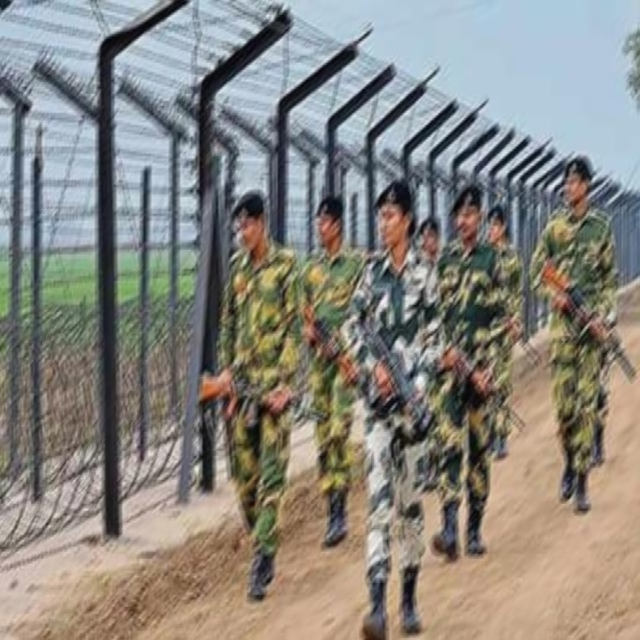

In [22]:
import torch
import torchvision
import torchvision.transforms as T
from PIL import Image

augmented_image = augment_image("test_sample_images/test1.jpg")

transform = T.ToPILImage()
augmented_img = transform(augmented_image)

display(augmented_img)


augmented_img.save("augmented_img.jpg")

In [23]:
detections = detect_and_classify_soldiers("augmented_img.jpg")

for detection in detections:
    print(f"Detected Soldier - Class ID: {detection['class_id']}, Confidence: {detection['confidence']}, BBox: {detection['bbox']}")


image 1/1 /home/rishabhnagar/practising/soldier_uniform_detection/augmented_img.jpg: 640x640 5 bsfs, 1 crpf, 50.8ms
Speed: 11.9ms preprocess, 50.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)
Detected Soldier - Class ID: 0, Confidence: 0.8767048120498657, BBox: [535.7359619140625, 141.08351135253906, 621.8468017578125, 522.9798583984375]
Detected Soldier - Class ID: 0, Confidence: 0.8722942471504211, BBox: [430.26318359375, 144.963134765625, 528.689208984375, 563.5213623046875]
Detected Soldier - Class ID: 0, Confidence: 0.8122177720069885, BBox: [198.218994140625, 171.51271057128906, 311.58514404296875, 600.7152099609375]
Detected Soldier - Class ID: 0, Confidence: 0.7949036359786987, BBox: [288.48681640625, 180.77415466308594, 376.15447998046875, 570.539306640625]
Detected Soldier - Class ID: 0, Confidence: 0.49289971590042114, BBox: [352.31329345703125, 171.10777282714844, 448.51837158203125, 637.4310302734375]
Detected Soldier - Class ID: 1, Confidence: 0.348